# Variational Autoencoders

In [41]:
# Imports
import sys

sys.path.append("../../")
from sklearn.metrics import confusion_matrix, roc_curve
from model.predict import *
from model.helpers import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [42]:
# load data
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../../data/master/"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
    "CVE-2012-2122",
    "CVE-2014-0160",
    "CVE-2017-7529",
    "CVE-2017-12635_6",
    "CVE-2018-3760",
    "CVE-2019-5418",
    "CVE-2020-9484",
    "CVE-2020-13942",
    "CVE-2020-23839",
    "CWE-89-SQL-injection",
]

for i in range(0, len(scenarios)):
    TRAIN[scenarios[i]] = pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(
        path + "/" + validation + scenarios[i] + ".pkl"
    )

In [43]:
models = {}
for i in range(0, len(scenarios)):
    models[scenarios[i]] = load_model(
        model_type="VariationalAutoencoder",
        train_data=TRAIN,
        test_data=TEST,
        scenario=scenarios[i],
        contamination_rate=False,
    )

298/298 [==============================] - 0s 462us/step


In [44]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="VariationalAutoencoder",
        data=TEST,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

1207/1207 [==============================] - 1s 430us/step


In [45]:
results["CVE-2012-2122"]["VariationalAutoencoder_predictions"].value_counts()

1    87017
0    42263
Name: VariationalAutoencoder_predictions, dtype: int64

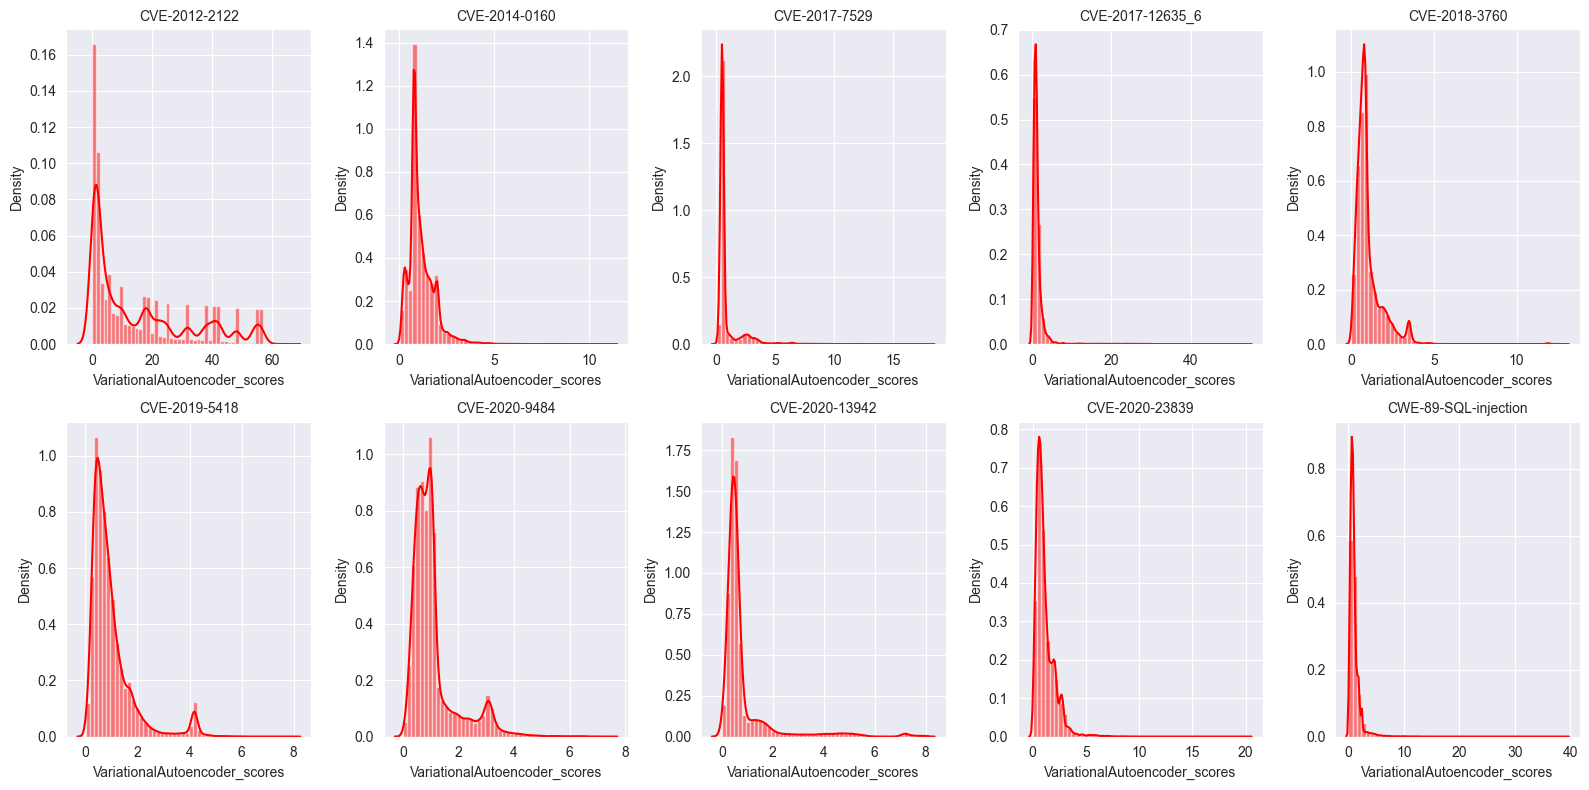

In [46]:
# Scores represent the shifted opposite of the Local Outlier Factor of X.
# Bigger is better, i.e. large values correspond to inliers.

# Distribution of Scores in each scenario
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(16, 8))
sns.distplot(
    results["CVE-2012-2122"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2014-0160"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2017-7529"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2017-12635_6"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2018-3760"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2019-5418"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-9484"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-13942"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-23839"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", fontsize=10, loc="center")

sns.distplot(
    results["CWE-89-SQL-injection"]["VariationalAutoencoder_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", fontsize=10, loc="center")
fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/VAE_Scoresdisplot.png")

In [47]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(TEST[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

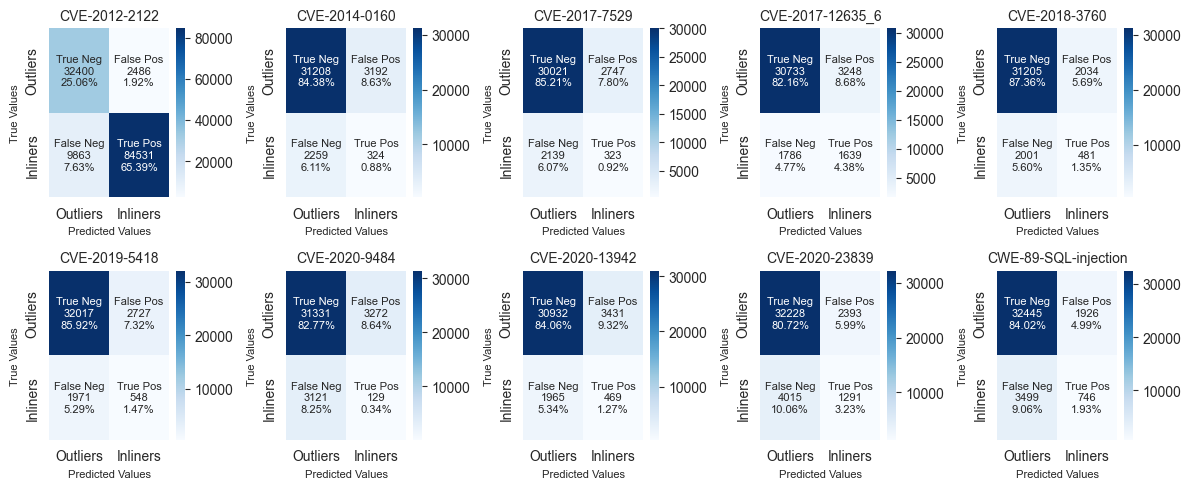

In [48]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["VariationalAutoencoder_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/VAE_ConfusionMatrix_testdata.png")

In [49]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )

    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/VAE_Table_FPR_FNR_ACC_TEST.tex")

In [50]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.07,0.10,0.90,0.97,0.90,0.93
CVE-2014-0160,0.09,0.87,0.13,0.09,0.85,0.11
CVE-2017-7529,0.08,0.87,0.13,0.11,0.86,0.12
CVE-2017-12635_6,0.10,0.52,0.48,0.34,0.87,0.39
CVE-2018-3760,0.06,0.81,0.19,0.19,0.89,0.19
CVE-2019-5418,0.08,0.78,0.22,0.17,0.87,0.19
CVE-2020-9484,0.09,0.96,0.04,0.04,0.83,0.04
CVE-2020-13942,0.10,0.81,0.19,0.12,0.85,0.15
CVE-2020-23839,0.07,0.76,0.24,0.35,0.84,0.29
CWE-89-SQL-injection,0.06,0.82,0.18,0.28,0.86,0.22


### How does the Algorithm behave when there are no outliers?

We will perform outlier truncation on the test data only for the exploit == False observations

In [51]:
no_outliers = {}
for i in range(0, len(scenarios)):
    normal = TEST[scenarios[i]][TEST[scenarios[i]]["exploit"] == False]
    attack = TEST[scenarios[i]][TEST[scenarios[i]]["exploit"] != False]
    # chose only cpu_usage and memory_usage
    normal = select_columns_outlier_truncate(normal)
    attack = select_columns_outlier_truncate(attack)
    # calculate IQR for each scenario
    Q1 = normal.quantile(0.25)
    Q3 = normal.quantile(0.75)
    IQR = Q3 - Q1
    normal = normal[
        ~((normal < (Q1 - 1.5 * IQR)) | (normal > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    no_outliers[scenarios[i]] = pd.concat([normal, attack])

In [52]:
# get all scenarios in one data set at the end
no_outliers_test = []
for key in no_outliers.keys():
    no_outliers[key]["scenario"] = key
    temp_df = no_outliers[key]
    no_outliers_test.append(temp_df)
no_outliers["ALL"] = pd.concat(no_outliers_test)

In [53]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(no_outliers[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

In [54]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="VariationalAutoencoder",
        data=no_outliers,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

1141/1141 [==============================] - 1s 464us/step


In [55]:
results["CVE-2012-2122"]

,cpu_usage,memory_usage,VariationalAutoencoder_predictions,VariationalAutoencoder_scores
timestamp,,,,
2021-09-13 16:11:26.915,0.04,84586496,0,1.76
2021-09-13 16:11:27.920,0.03,84815872,0,1.77
2021-09-13 16:11:28.925,0.01,84832256,0,2.09
2021-09-13 16:11:29.931,0.03,85037056,0,1.73
2021-09-13 16:11:30.936,0.05,85245952,0,1.52
...,...,...,...,...
2021-09-14 14:10:08.467,0.05,91000832,0,0.75
2021-09-14 14:10:09.474,0.04,91033600,0,0.72
2021-09-14 14:10:10.480,0.07,91176960,0,1.04


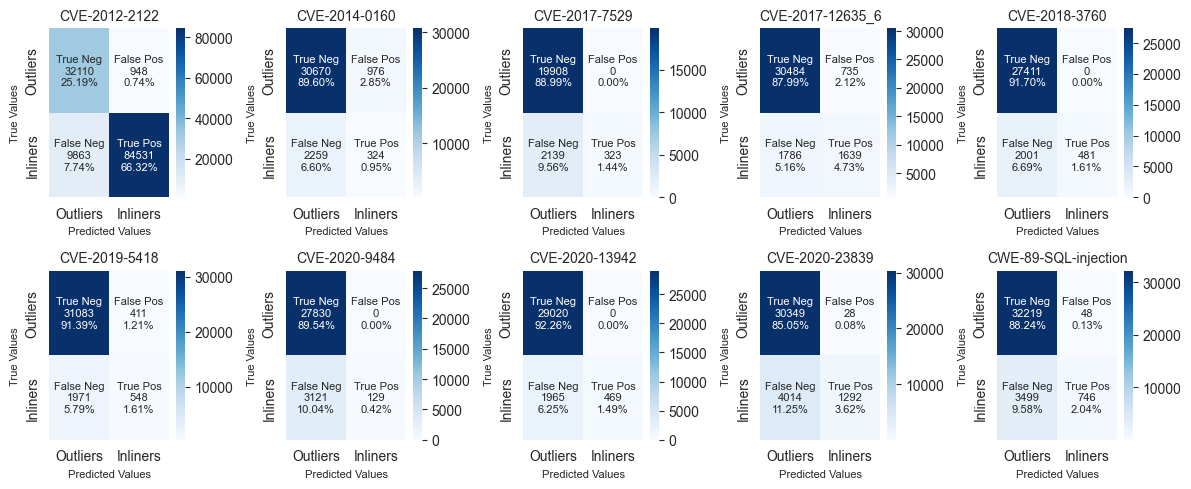

In [56]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["VariationalAutoencoder_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/VAE_ConfusionMatrix_no_outliers_testdata.png")

In [57]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/VAE_Table_FPR_FNR_ACC_TEST_no_outliers.tex")

In [58]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.03,0.10,0.90,0.99,0.92,0.94
CVE-2014-0160,0.03,0.87,0.13,0.25,0.91,0.17
CVE-2017-7529,0.00,0.87,0.13,1.00,0.90,0.23
CVE-2017-12635_6,0.02,0.52,0.48,0.69,0.93,0.57
CVE-2018-3760,0.00,0.81,0.19,1.00,0.93,0.32
CVE-2019-5418,0.01,0.78,0.22,0.57,0.93,0.32
CVE-2020-9484,0.00,0.96,0.04,1.00,0.90,0.08
CVE-2020-13942,0.00,0.81,0.19,1.00,0.94,0.32
CVE-2020-23839,0.00,0.76,0.24,0.98,0.89,0.39
CWE-89-SQL-injection,0.00,0.82,0.18,0.94,0.90,0.30


### Evaluation after Threshold Adjustment

In [59]:
thresholds_ = {}
for i in range(0, len(scenarios)):
    # prepare test data
    X_test = no_outliers[scenarios[i]]
    X_test = select_columns_for_modelling(X_test)
    scores = models[scenarios[i]].decision_function(X_test)
    fpr_test_, tpr_test_, thresholds = roc_curve(y_true[scenarios[i]], scores)
    J = tpr_test_ - fpr_test_
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    thresholds_[scenarios[i]] = best_thresh

1141/1141 [==============================] - 1s 465us/step


In [60]:
thresholds_

{'CVE-2012-2122': 2.4608815916350473,
 'CVE-2014-0160': 1.6147297587533032,
 'CVE-2017-7529': 0.5358294959731601,
 'CVE-2017-12635_6': 1.3985790290357751,
 'CVE-2018-3760': 1.190418918010304,
 'CVE-2019-5418': 2.1237742414861076,
 'CVE-2020-9484': 1.0026620556829127,
 'CVE-2020-13942': 0.8499331961314142,
 'CVE-2020-23839': 1.4136554540387432,
 'CWE-89-SQL-injection': 1.4715904844810876}

In [61]:
for key in thresholds_.keys():
    results[key].loc[
        (results[key]["VariationalAutoencoder_scores"] > thresholds_[key]),
        "VariationalAutoencoder_predictions",
    ] = 1

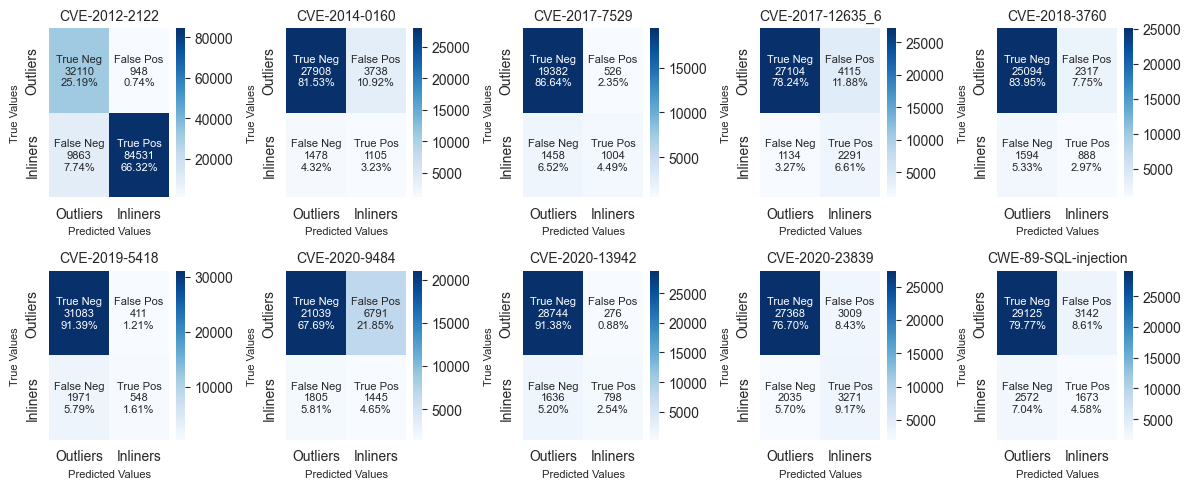

In [62]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["VariationalAutoencoder_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig(
    "../../../src/plots/models/VAE_ConfusionMatrix_no_outliers_threshold_adjustment_testdata.png"
)

In [63]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex(
    "../../../src/tables/VAE_Table_FPR_FNR_ACC_TEST_no_outliers_threshold_adjustment.tex"
)

In [64]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.03,0.10,0.90,0.99,0.92,0.94
CVE-2014-0160,0.12,0.57,0.43,0.23,0.85,0.30
CVE-2017-7529,0.03,0.59,0.41,0.66,0.91,0.50
CVE-2017-12635_6,0.13,0.33,0.67,0.36,0.85,0.47
CVE-2018-3760,0.08,0.64,0.36,0.28,0.87,0.31
CVE-2019-5418,0.01,0.78,0.22,0.57,0.93,0.32
CVE-2020-9484,0.24,0.56,0.44,0.18,0.72,0.25
CVE-2020-13942,0.01,0.67,0.33,0.74,0.94,0.45
CVE-2020-23839,0.10,0.38,0.62,0.52,0.86,0.56
CWE-89-SQL-injection,0.10,0.61,0.39,0.35,0.84,0.37


## Results after adjusting the contamination rate dynamically

- Results with natural outliers
- Results no natural outliers

In [65]:
# load model
models = {}
for i in range(0, len(scenarios)):
    # get dict and save mofel for each scenario
    models[scenarios[i]] = load_model(
        model_type="VariationalAutoencoder",
        train_data=TRAIN,
        test_data=TEST,
        scenario=scenarios[i],
        contamination_rate=True,
    )

CVE-2012-2122:0.5
301/301 [==============================] - 0s 452us/step
CVE-2014-0160:0.07508720930232558
299/299 [==============================] - 0s 438us/step
CVE-2017-7529:0.07513427734375
296/296 [==============================] - 0s 435us/step
CVE-2017-12635_6:0.1007916188458256
294/294 [==============================] - 0s 445us/step
CVE-2018-3760:0.07467131983513343
296/296 [==============================] - 0s 446us/step
CVE-2019-5418:0.07250172691687773
300/300 [==============================] - 0s 452us/step
CVE-2020-9484:0.09392249226945641
300/300 [==============================] - 0s 661us/step
CVE-2020-13942:0.0708319995343829
300/300 [==============================] - 0s 441us/step
CVE-2020-23839:0.1532595823344213
299/299 [==============================] - 0s 447us/step
CWE-89-SQL-injection:0.1235052806144715
298/298 [==============================] - 0s 441us/step


In [66]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="VariationalAutoencoder",
        data=TEST,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

1207/1207 [==============================] - 1s 425us/step


In [67]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(TEST[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

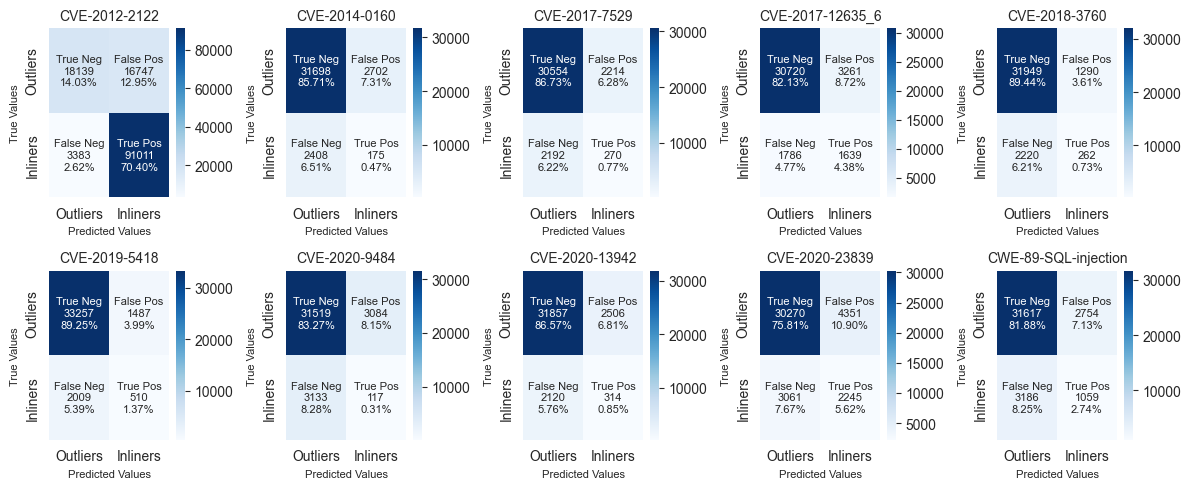

In [68]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["VariationalAutoencoder_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/VAE_ConfusionMatrix_contamination_rate.png")

In [69]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/VAE_Table_FPR_FNR_ACC_TEST_contamination_rate.tex")

In [70]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.48,0.04,0.96,0.84,0.84,0.90
CVE-2014-0160,0.08,0.93,0.07,0.06,0.86,0.06
CVE-2017-7529,0.07,0.89,0.11,0.11,0.87,0.11
CVE-2017-12635_6,0.10,0.52,0.48,0.33,0.87,0.39
CVE-2018-3760,0.04,0.89,0.11,0.17,0.90,0.13
CVE-2019-5418,0.04,0.80,0.20,0.26,0.91,0.23
CVE-2020-9484,0.09,0.96,0.04,0.04,0.84,0.04
CVE-2020-13942,0.07,0.87,0.13,0.11,0.87,0.12
CVE-2020-23839,0.13,0.58,0.42,0.34,0.81,0.38
CWE-89-SQL-injection,0.08,0.75,0.25,0.28,0.85,0.26


In [71]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="VariationalAutoencoder",
        data=no_outliers,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

1141/1141 [==============================] - 1s 460us/step


In [72]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(no_outliers[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

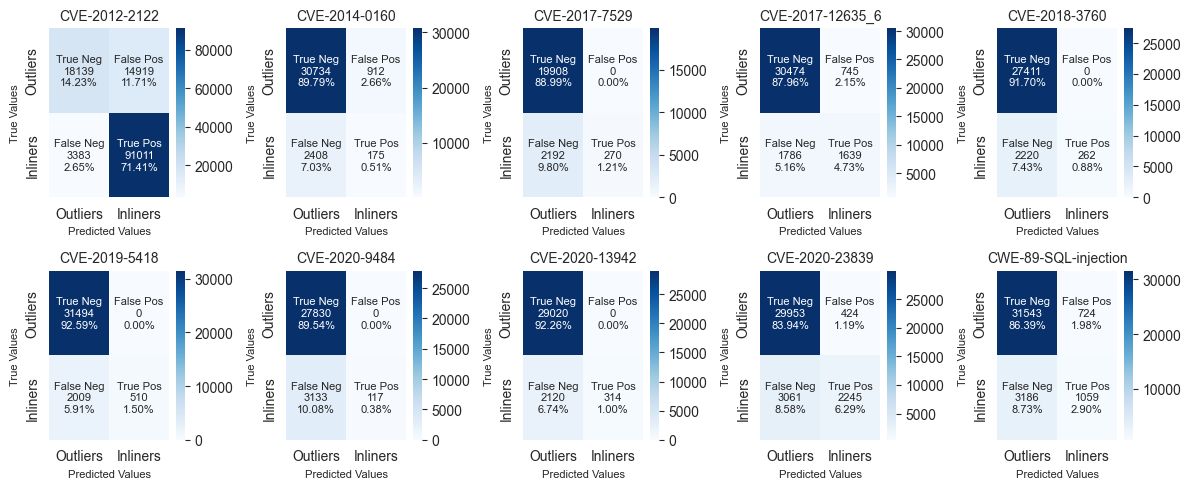

In [73]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["VariationalAutoencoder_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig(
    "../../../src/plots/models/VAE_ConfusionMatrix_contamination_rate_no_outliers.png"
)

In [74]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex(
    "../../../src/tables/VAE_Table_FPR_FNR_ACC_TEST_contamination_rate_no_outliers.tex"
)

In [75]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.45,0.04,0.96,0.86,0.86,0.91
CVE-2014-0160,0.03,0.93,0.07,0.16,0.90,0.10
CVE-2017-7529,0.00,0.89,0.11,1.00,0.90,0.20
CVE-2017-12635_6,0.02,0.52,0.48,0.69,0.93,0.56
CVE-2018-3760,0.00,0.89,0.11,1.00,0.93,0.19
CVE-2019-5418,0.00,0.80,0.20,1.00,0.94,0.34
CVE-2020-9484,0.00,0.96,0.04,1.00,0.90,0.07
CVE-2020-13942,0.00,0.87,0.13,1.00,0.93,0.23
CVE-2020-23839,0.01,0.58,0.42,0.84,0.90,0.56
CWE-89-SQL-injection,0.02,0.75,0.25,0.59,0.89,0.35


## Which data points identify as False Positves and why? 
- Scenario CVE-2012-2122 
- Scenario CVE-2020-9484

In [76]:
# look at the complete data
for i in range(0, len(scenarios)):
    results[scenarios[i]]["True_Exploit"] = y_true[scenarios[i]]

In [77]:
fp_CVE_2012_2122 = results["CVE-2012-2122"][
    (results["CVE-2012-2122"]["True_Exploit"] == 0)
    & (results["CVE-2012-2122"]["VariationalAutoencoder_predictions"] == 1)
]
tp_CVE_2012_2122 = results["CVE-2012-2122"][
    (results["CVE-2012-2122"]["True_Exploit"] == 1)
    & (results["CVE-2012-2122"]["VariationalAutoencoder_predictions"] == 1)
]
fp_CVE_2020_9484 = results["CVE-2020-9484"][
    (results["CVE-2020-9484"]["True_Exploit"] == 0)
    & (results["CVE-2020-9484"]["VariationalAutoencoder_predictions"] == 1)
]
tp_CVE_2020_9484 = results["CVE-2020-9484"][
    (results["CVE-2020-9484"]["True_Exploit"] == 1)
    & (results["CVE-2020-9484"]["VariationalAutoencoder_predictions"] == 1)
]

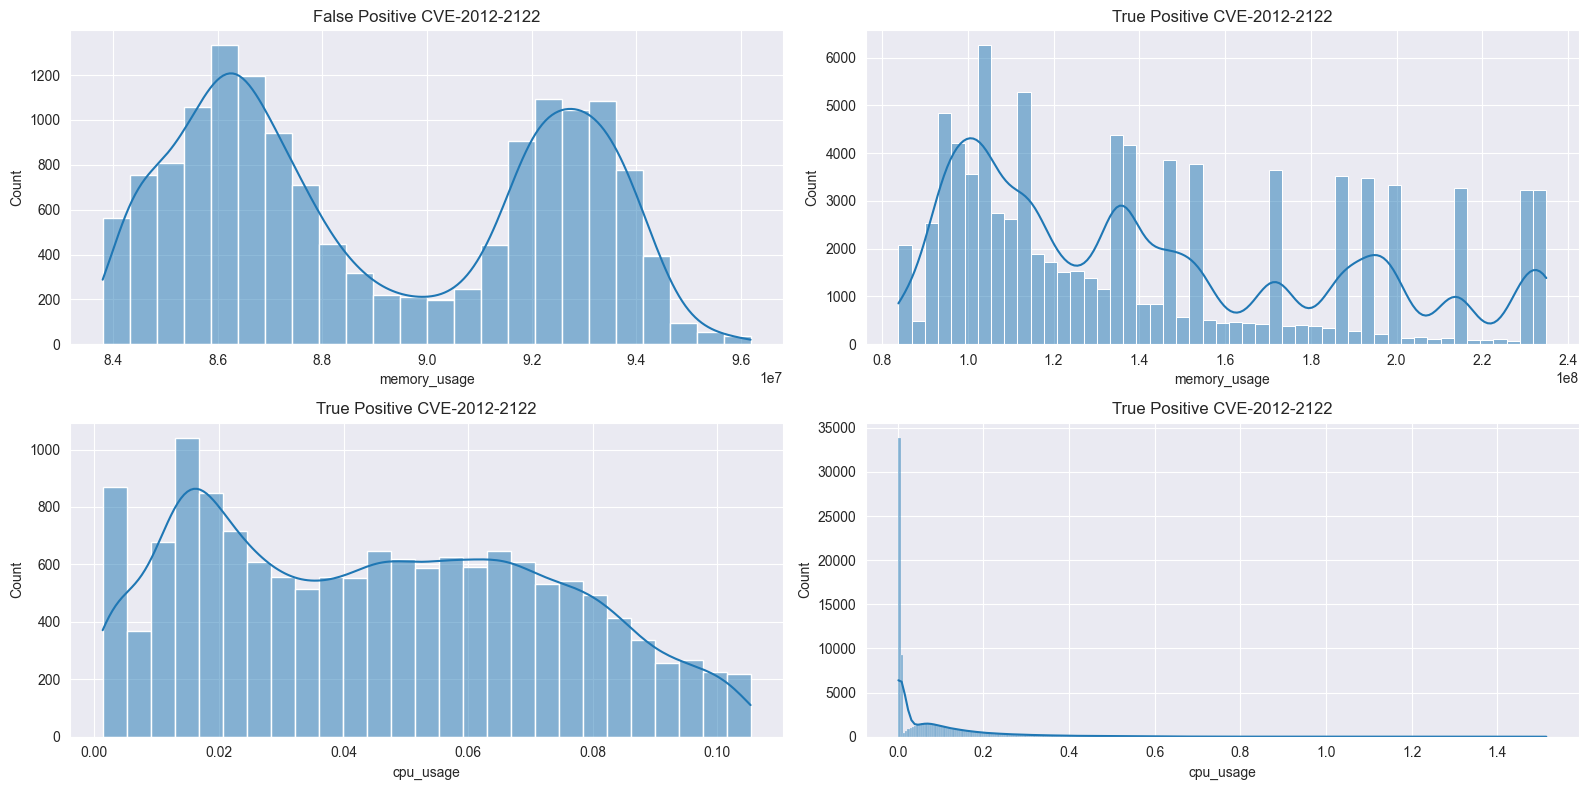

In [78]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16, 8))
sns.histplot(data=fp_CVE_2012_2122, x="memory_usage", kde=True, ax=axes[0, 0])
axes[0, 0].title.set_text("False Positive CVE-2012-2122")
sns.histplot(data=tp_CVE_2012_2122, x="memory_usage", kde=True, ax=axes[0, 1])
axes[0, 1].title.set_text("True Positive CVE-2012-2122")
sns.histplot(data=fp_CVE_2012_2122, x="cpu_usage", kde=True, ax=axes[1, 0])
axes[1, 0].title.set_text("True Positive CVE-2012-2122")
sns.histplot(data=tp_CVE_2012_2122, x="cpu_usage", kde=True, ax=axes[1, 1])
axes[1, 1].title.set_text("True Positive CVE-2012-2122")
fig.tight_layout()
plt.show()

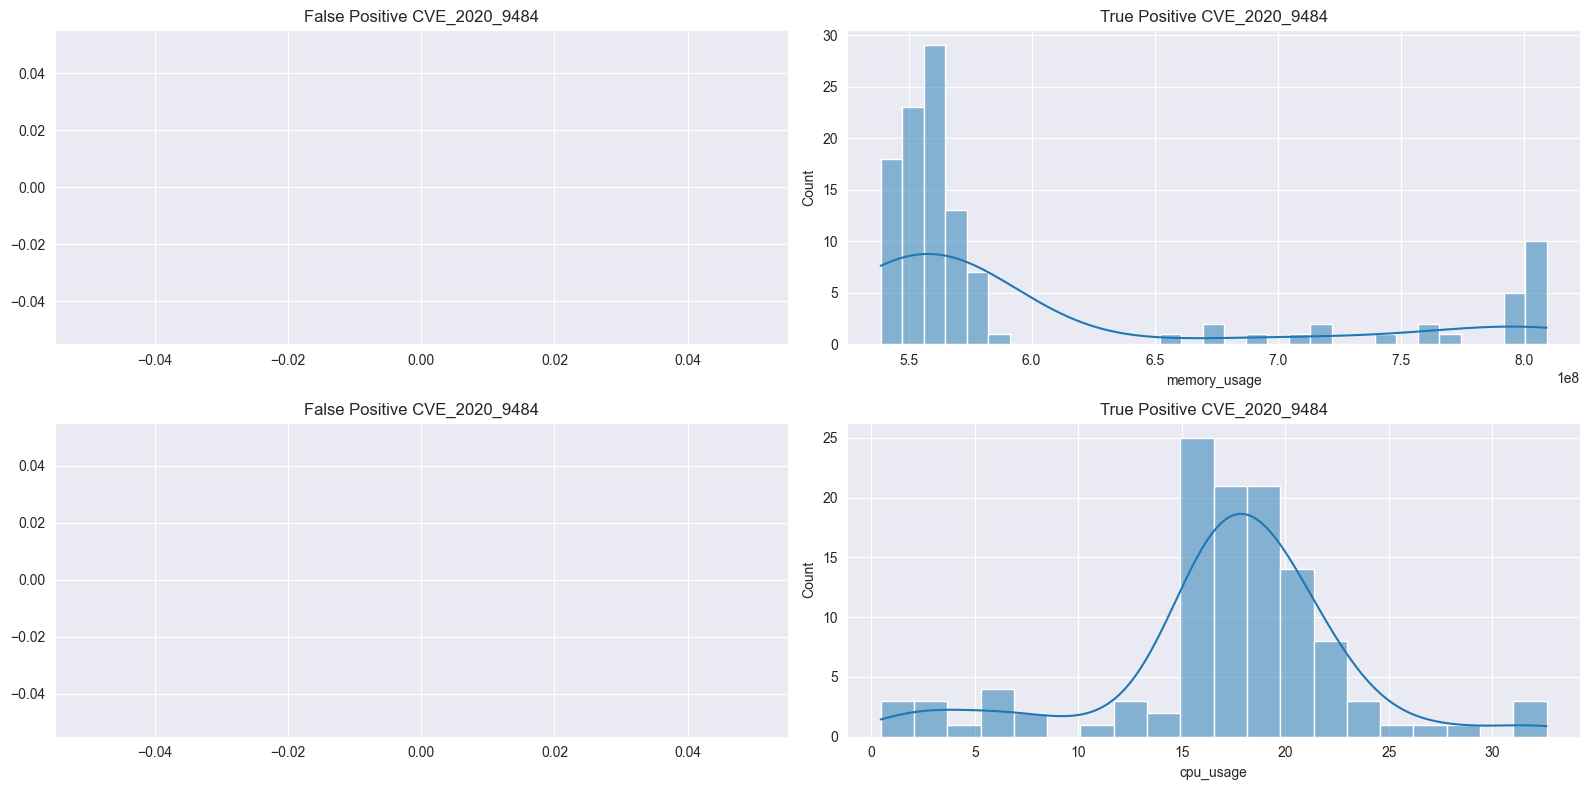

In [79]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16, 8))
sns.histplot(data=fp_CVE_2020_9484, x="memory_usage", kde=True, ax=axes[0, 0])
axes[0, 0].title.set_text("False Positive CVE_2020_9484")
sns.histplot(data=tp_CVE_2020_9484, x="memory_usage", kde=True, ax=axes[0, 1])
axes[0, 1].title.set_text("True Positive CVE_2020_9484")
sns.histplot(data=fp_CVE_2020_9484, x="cpu_usage", kde=True, ax=axes[1, 0])
axes[1, 0].title.set_text("False Positive CVE_2020_9484")
sns.histplot(data=tp_CVE_2020_9484, x="cpu_usage", kde=True, ax=axes[1, 1])
axes[1, 1].title.set_text("True Positive CVE_2020_9484")
fig.tight_layout()
plt.show()